<h1> Earthquake Exercise <\>

- Working with the US Geological Survey earthquake data set

<h3> Stage 1 <\>

Determine the location of the largest magnitude earthquake in the UK this century.
1. Get the text of the web result
2. Parse the data as JSON
3. Understand how the data is structured into dictionaries and lists:
  * Where is the magnitude?
  * Where is the place description or coordinates?
4. Program a search through all the quakes to find the biggest quake
5. Find the place of the biggest quake
6. Form a URL for an online map service at that latitude and longitude: look back at the introductory example
7. Display that image

In [219]:
import requests
quakes = requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                      params={
                          'starttime': "2000-01-01",
                          "maxlatitude": "58.723",
                          "minlatitude": "50.008",
                          "maxlongitude": "1.67",
                          "minlongitude": "-9.756",
                          "minmagnitude": "1",
                          "endtime": "2018-10-11",
                          "orderby": "time-asc"}
                      )

quakes.text[0:100]

'{"type":"FeatureCollection","metadata":{"generated":1571951200000,"url":"https://earthquake.usgs.gov'

In [220]:
import json
# using json to load string to make it Python
json_request = json.loads(quakes.text)
type(json_request)

dict

In [221]:
# calling keys to see what is in the dictionary
json_request.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [222]:
json_request["features"];
# is a list

In [223]:
# keys of the features dictionary
json_request["features"][0].keys()

dict_keys(['type', 'properties', 'geometry', 'id'])

In [224]:
json_request["features"][0]['properties']

{'mag': 2.6,
 'place': 'England, United Kingdom',
 'time': 956553055700,
 'updated': 1415322596133,
 'tz': None,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
 'felt': None,
 'cdi': None,
 'mmi': None,
 'alert': None,
 'status': 'reviewed',
 'tsunami': 0,
 'sig': 104,
 'net': 'us',
 'code': 'p0009rst',
 'ids': ',usp0009rst,',
 'sources': ',us,',
 'types': ',impact-text,origin,phase-data,',
 'nst': None,
 'dmin': None,
 'rms': None,
 'gap': None,
 'magType': 'ml',
 'type': 'earthquake',
 'title': 'M 2.6 - England, United Kingdom'}

In [225]:
json_request["features"][0]['properties'].keys()

dict_keys(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type', 'title'])

In [226]:
# printing out amplitude of the earthquake
json_request["features"][0]['properties']['mag']
json_request["features"][1]['properties']['mag']

4

In [227]:
# coordinates
json_request["features"][0]['geometry']['coordinates']


[-2.81, 54.77, 14]

In [228]:
print("At coordinates:")
print(json_request["features"][0]['geometry']['coordinates'])
print("The maximal aplitude of the eathquake:")
print(json_request["features"][0]['properties']['mag'])

At coordinates:
[-2.81, 54.77, 14]
The maximal aplitude of the eathquake:
2.6


In [229]:
type(json_request["features"])

list

In [230]:
data = json_request["features"]
x = data[0]
for element in data:
    #print(x)
    # each element in data is called datax (the list is called datax) !! IMPORTANT
    if x["properties"]["mag"] < element["properties"]["mag"]:
        x = element # data fo first maxima saved in variable y
print(x["properties"]["mag"] )

4.8


In [231]:
# NO LONGER NEEDED, INTERMEDIUM CHECK

#coordinatesx = x["geometry"]['coordinates']
    #unpacking more at the same time
#long, lat, something = x["geometry"]['coordinates']
#place1 = [long, lat, something]
#print(place1)

In [232]:
# MULTIPLE MAXIMA POSSIBLE - FIND THEM
for element in data:
     if element["properties"]["mag"] == x["properties"]["mag"]:
            y = element # data of second maxima saved in variable y 
            place2 = element["geometry"]['coordinates']
            print(place2) # to see, how many maxima are there
# second maxima data save to variables (because Python rewrites)

[-2.15, 52.52, 9.4]
[-0.332, 53.403, 18.4]


In [233]:
# NO LONGER NEEDED, INTERMEDIUM CHECK

#coord = y["geometry"]['coordinates']
#print(coord)
#print(place2[0])

In [234]:
# all coordinates of places with max. amplitude concatenated
allcoordinates = [x["geometry"]['coordinates']] + [y["geometry"]['coordinates']]
print(allcoordinates)


[[-2.15, 52.52, 9.4], [-0.332, 53.403, 18.4]]


In [235]:
# unpacking more at the same time
long1, lat1, something1 = allcoordinates[0]
long2, lat2, something2 = allcoordinates[1]
#print("First place with maximal earthquake amplitude:")
#print("Longitude:")
#print(long1)
#print("Latitude:")
#print(lat1)
#print("Second place with maximal earthquake amplitude:")
#print("Longitude:")
#print(long2)
#print("Latitude:")
#print(lat2)

In [236]:
print("First place:")
print("Latitude: {}, Longitude: {}".format(lat1,long1))
print("The maximal amplitude is:")
print(x["properties"]["mag"])
print("Second place:")
print("Latitude: {}, Longitude: {}".format(lat2,long2))
print("The maximal amplitude is:")
print(x["properties"]["mag"])

First place:
Latitude: 52.52, Longitude: -2.15
The maximal amplitude is:
4.8
Second place:
Latitude: 53.403, Longitude: -0.332
The maximal amplitude is:
4.8


In [237]:
# MAP of the first location
import requests


def request_map_at(lat, long, satellite=True,
                   zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"

    params = dict(
        z=zoom,
        size="{},{}".format(size[0], size[1]),
        ll="{},{}".format(long, lat),
        l="sat" if satellite else "map",
        lang="en_US"
    )

    return requests.get(base, params=params)

In [238]:
map_png1 = request_map_at(lat1, long1, zoom=10, satellite=True)

England, United Kingdom
Latitude: 52.52, Longitude: -2.15


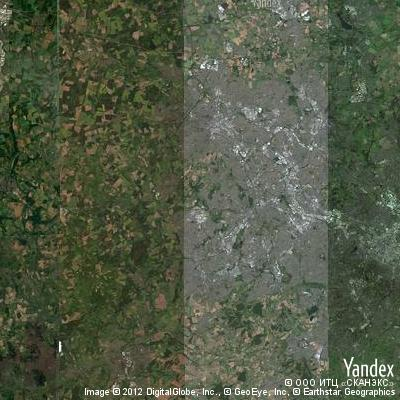

In [239]:
# DISPLAY MAP

#from IPython.display import Image
#Image(map_png1.content)
#print(lat1)
#print(long1)
print(x['properties']['place'])
print("Latitude: {}, Longitude: {}".format(lat1,long1))
import IPython
IPython.core.display.Image(map_png1.content)

England, United Kingdom
Latitude: 53.403, Longitude: -0.332


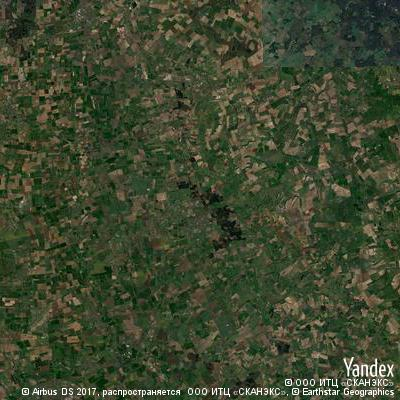

In [240]:
#print(lat2)
#print(long2)
map_png2 = request_map_at(lat2, long2, zoom=10, satellite=True)
#Image(map_png2.content)
print(y['properties']['place'])
print("Latitude: {}, Longitude: {}".format(lat2,long2))
IPython.core.display.Image(map_png2.content)

<h3> Stage 2: Discussion: DONE <\>

<h3> Stage 3 <\>

Produce two plots, showing:

1. the frequency (number) of earthquakes per year
2. the average magnitude of earthquakes per year

Documentation on structure of the data: https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

In [241]:
# Extracting the time from the data
# Reported in milliseconds since the epoch ( 1970-01-01T00:00:00.000Z)
# Does not include leap seconds

# TIME FOR X
from datetime import datetime

#timeform = "%Y-%m-%d %H:%M:%S" #format of the time
timeform = "%Y" #format of the time
# TIME FOR X
#for element in data:
# miliseconds = x["properties"]["time"]
# t = datetime.fromtimestamp(miliseconds/1000) # stamps provided in miliseconds since epoch
# print(t.strftime(timeform))

In [242]:
# TIME FOR ALL, LOOP
# MAGNITUDE

magnitude = []
formatedd =[]
# defined before that data = json_request["features"]
for element in data:
    miliseconds = element["properties"]["time"]
    t = datetime.fromtimestamp(miliseconds/1000) # stamps provided in miliseconds since epoch
    formated = t.strftime(timeform) # formatted time
    formatedd.append(formated)
    mag = (formated, element["properties"]["mag"]) # creating a list of tuples of year and magnitude
    magnitude.append(mag) # to calculate the average magnitude of earthquakes per year
print("Years for all earthquakes:") 
print(formatedd)
print("Number of earthquakes")
print(len(formatedd))
print ("Dictionary of year and magnitude")
print(magnitude)       

Years for all earthquakes:
['2000', '2000', '2000', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2003', '2003', '2003', '2003', '2003', '2004', '2004', '2004', '2004', '2004', '2004', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2006', '2006', '2006', '2006', '2006', '2006', '2006', '2006', '2006', '2006', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2009', '2009', '2009', '2010', '2011', '2011', '2011', '2011', '2013', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2017', '2017', '2018', '2018', '2018', '2018', '2018', '2018', '2018']
Number of ea

In [243]:
from collections import Counter
counted = Counter(formatedd)
print(counted.keys())
print(counted.values())

# converting keys and values to a list
years = list(counted.keys())
occurance = list(counted.values())

dict_keys(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2013', '2014', '2015', '2017', '2018'])
dict_values([3, 9, 21, 5, 6, 10, 10, 16, 9, 3, 1, 4, 6, 3, 5, 2, 7])


In [244]:
# PLOTTING A GRAPH
from matplotlib import pyplot as plt
%matplotlib inline

# changing size of the figure
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

fig_size[0] = 12 # width
fig_size[1] = 6 # height
plt.rcParams["figure.figsize"] = fig_size

[6.0, 4.0]


Appropriate plot, choose from: https://python-graph-gallery.com/

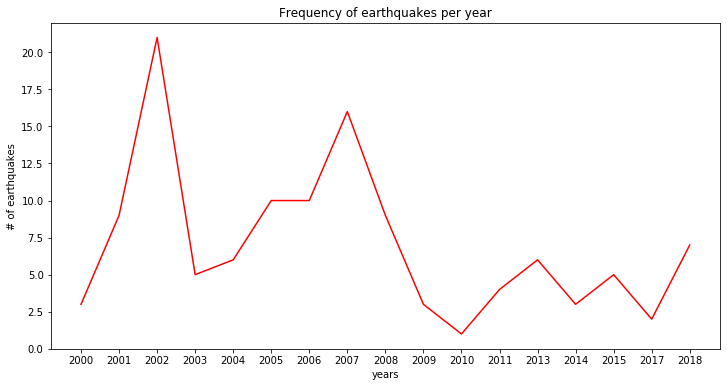

<Figure size 864x432 with 0 Axes>

In [245]:
# the frequency (number) of earthquakes per year
plt.plot(years, occurance, "r")
plt.xlabel("years")
plt.ylabel("# of earthquakes")
plt.title("Frequency of earthquakes per year")
plt.show()
plt.savefig('noquakesperyear.png')

In [246]:
# the average magnitude of earthquakes per year

# MOVED TO TIME
# magnitude = []
# defined before that data = json_request["features"]
#for element in data:
#    mag = {formated: element["properties"]["mag"]}
#    magnitude.append(mag)
#print(magnitude)

# Python code to get sum of tuples having same first value 
  
# Initialisation of list of tuple 

# USED THIS BUT IDK WHAT IT MEANS
  
d = {x:0 for x, _ in magnitude} 
  
for name, num in magnitude: d[name] += num 
  
#using map 

Output = list(map(tuple, d.items())) 
  
# printing output 
print(Output)  

[('2000', 10.6), ('2001', 28.5), ('2002', 64.89999999999999), ('2003', 13.8), ('2004', 19.700000000000003), ('2005', 27.2), ('2006', 26.700000000000006), ('2007', 33.7), ('2008', 27.899999999999995), ('2009', 10.2), ('2010', 3.5), ('2011', 13.700000000000001), ('2013', 17.9), ('2014', 10.2), ('2015', 16.2), ('2017', 6.4), ('2018', 21.4)]


In [247]:
# list comprehension:
summagni = [x[1] for x in Output]
print(summagni)
# [] define it returns a list
# x exists only in comprehension
# x[1] points to the second item in each of the tuples
# READS AS "return the second item in a tuple for all tuples in list Output."

# print occurance of years to know how to divide
print(occurance)

[10.6, 28.5, 64.89999999999999, 13.8, 19.700000000000003, 27.2, 26.700000000000006, 33.7, 27.899999999999995, 10.2, 3.5, 13.700000000000001, 17.9, 10.2, 16.2, 6.4, 21.4]
[3, 9, 21, 5, 6, 10, 10, 16, 9, 3, 1, 4, 6, 3, 5, 2, 7]


In [248]:
# import NUMPY as one can do a/b
import numpy as np
a=np.array(summagni, dtype=np.float)
b=np.array(occurance, dtype=np.float)
c=np.array (years, dtype=np.integer)
average = a/b
averagel = list(a/b) # to plot as plot
print(average)
print(c)

[3.53333333 3.16666667 3.09047619 2.76       3.28333333 2.72
 2.67       2.10625    3.1        3.4        3.5        3.425
 2.98333333 3.4        3.24       3.2        3.05714286]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2013 2014
 2015 2017 2018]


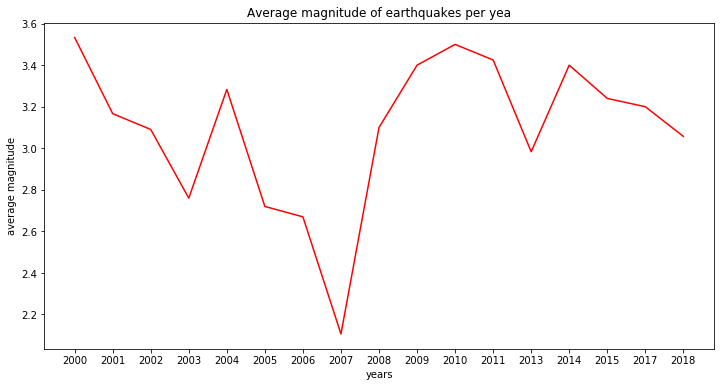

<Figure size 864x432 with 0 Axes>

In [249]:
# Plot graph of the average magnitude of earthquakes per year
plt.plot(years, average, "r")
plt.xlabel("years")
plt.ylabel("average magnitude")
plt.title("Average magnitude of earthquakes per yea")
plt.show()
plt.savefig('avmagniperyear.png')